# Autoencoder for mnist dataset

### First import the necessary libraries and load the mnist dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Image example

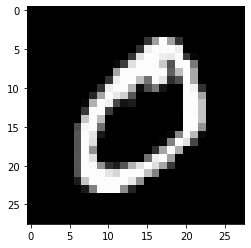

In [2]:
plt.imshow(x_train[1], cmap="gray")

## Checking the image size

In [3]:
print(f"Image size is {x_train[1].shape} pixels")

Image size is (28, 28) pixels


### This means that the number of features that will be passed to the neural network is 28 * 28 features

In [4]:
print(f"Total number of features are {x_train[1].shape[0] ** 2}")

Total number of features are 784


## The autoencoder will atemp to reduce the number of features that are needed to replicate each image

### First of all, for image data is better to divide by 255 so the numbers stay between 0 and 1

In [5]:
max_value = np.max(x_train[1])
max_value

255

In [6]:
x_train = x_train / max_value
x_test = x_test / max_value

## Autoenconder model

In [7]:
## Enconder
enconder_input = keras.Input(shape=(28, 28, 1), name="image")
layer = keras.layers.Flatten()(enconder_input) # The data is 28 by 28, by flattening it, the data will become a vector of size 784
enconder_output = keras.layers.Dense(64, activation="relu")(layer) # Dense layer with 64 units and relu as the activation function

enconder = keras.Model(enconder_input, enconder_output, name="encoder") # encoder model is finished
## Decoder
decoder_input = keras.layers.Dense(784, activation="relu")(enconder_output)
decoder_output = keras.layers.Reshape((28, 28, 1))(decoder_input) # reshape to 28 by 28 to be the exact match of the input

autoencoder = keras.Model(enconder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.compile(optimizer="adam", loss="mse")
history = autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0179 - val_loss: 0.0119
Epoch 2/3
1688/1688 [==============================] - 2s 925us/step - loss: 0.0115 - val_loss: 0.0111
Epoch 3/3
1688/1688 [==============================] - 2s 966us/step - loss: 0.0110 - val_loss: 0.0109


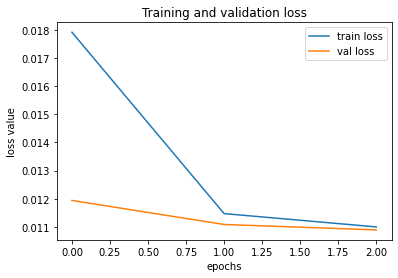

In [9]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loss, label="train loss")
plt.plot(history_df.val_loss, label="val loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.legend(loc="best")
plt.show()

## Condensed version of the image

### This pixels correspond to the most important ones from the 784

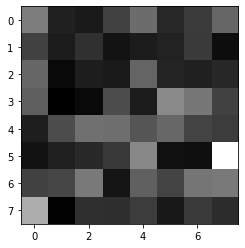

In [10]:
example = enconder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]
plt.imshow(example.reshape((8,8)), cmap="gray")
plt.show()

## The real image

### This will be the image that i will use to check if the autoenconder works

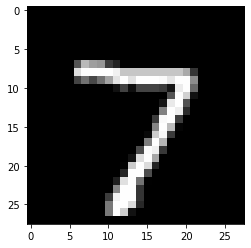

In [11]:
plt.imshow(x_test[0], cmap="gray")
plt.show()

## what the autoencoder reconstructed from the condensed image

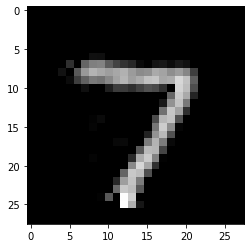

In [12]:
autoencoder_out = autoencoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]
plt.imshow(autoencoder_out, cmap="gray")
plt.show()

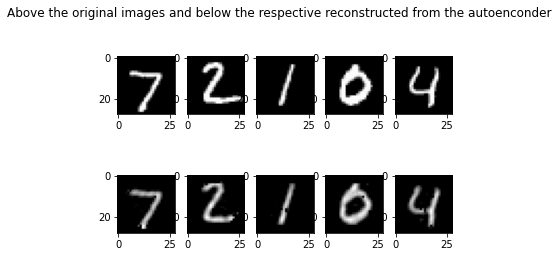

In [13]:
n_images = 5
c = 1

for n_img in range(n_images):
    plt.subplot(2, n_images, c)
    plt.imshow(x_test[n_img], cmap="gray")
    plt.subplot(2, n_images, c + n_images)
    autoencoder_out = autoencoder.predict([x_test[n_img].reshape(-1, 28, 28, 1)])[0]
    plt.imshow(autoencoder_out, cmap="gray")
    c += 1

plt.suptitle("Above the original images and below the respective reconstructed from the autoenconder")
plt.show()